In [1]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
def read_gauge_data(gauge_file):
    """
    Read gauge data from a guage file.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(2,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    levels = data1[:,0]
    time = data1[:,1]
    h = data1[:,2]
    hu = data1[:,3]
    hv = data1[:,4]
    eta = data1[:,5]

    eta_max = max(eta)
    topo = eta - h

    return time, h,eta,topo


def read_valid(gauge_file):
    """
    Read gauge data from a literature data.
    """
    with open(gauge_file) as f:
        data = f.read().splitlines()
        data1 = []
        for i in range(1,len(data)):
            data[i] = data[i].split()
            data1.append([float(x) for x in data[i]])
            
    data1 = array(data1)
    guage = data1[:,0]
    z = data1[:,1]
    h_max = data1[:,2]
    eta_max = data1[:,3]

    return h_max, eta_max

In [28]:
time,h,eta, topo = read_gauge_data("gauge00000.txt")
# print time, h, eta, topo
print('time =  ', time/3600)
print('h = ', h)
print('eta = ', eta)
# print('topo = ', topo)

time =   [0.         0.13913044 0.27826086 0.41739131 0.55652175 0.69565217
 0.83478261 0.97391306 1.11304347 1.25217392 1.39130436 1.53043478
 1.66956522 1.80869564 1.94782608 2.08695653 2.22608694 2.36521739
 2.50434783 2.64347825 2.78260861 2.92173917 3.06086944 3.2
 3.33913056]
h =  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03948782 0.10630778 0.15430067 0.19232397 0.22304216
 0.24839613]
eta =  [8.2098085 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085
 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085
 8.2098085 8.2098085 8.2098085 8.2098085 8.2098085 8.2483785 8.3151985
 8.3631914 8.4012147 8.4319329 8.4572868]


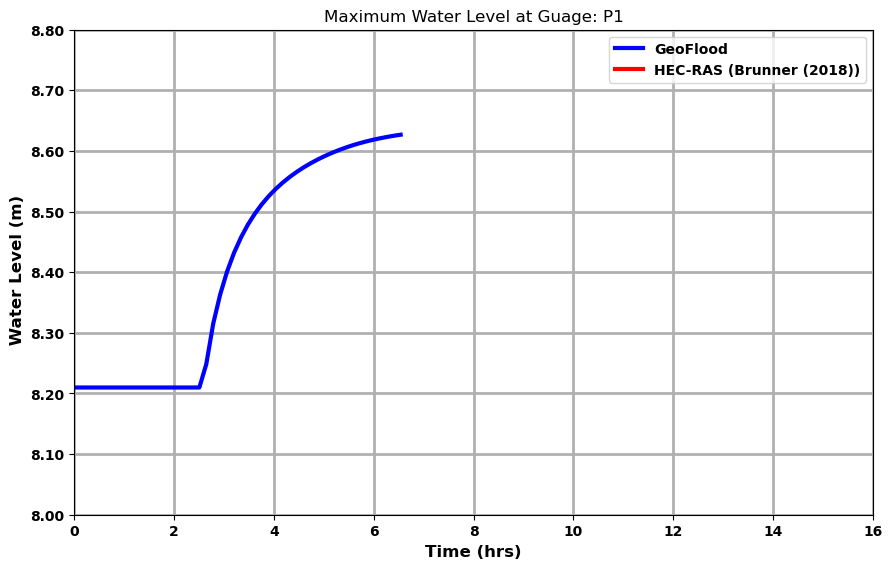

In [30]:
time,h,eta, topo = read_gauge_data("gauge00000.txt")
# plot the data
figsize(10.30, 6.30)
# figure(figsize=(13.22, 8.90), dpi=300)
# rcParams['font.family'] = 'Arial'
figure(5)
plot(time/3600,eta,'b-',label='GeoFlood',linewidth=3)
# plot (time/3600,[10.35]*len(h),'g--',label='GeoClaw',linewidth=3)
# plot (time/3600,[10.25]*len(h),'k--',label='Valid',linewidth=3)
# plot(geoclaw_maxeta,'r-o',label='GeoClaw')

axis([0, 16, 8.0, 8.80])

# line = Line2D([0], [0], label='HEC-RAS', color='r', linewidth=3)
ylabel(' Water Level (m)', fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Time (hrs)', fontdict={'fontsize': 12, 'fontweight': 'bold'})

# legend(handles=handles, prop={'size': 10, 'weight': 'bold'},frameon=False)
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['GeoFlood','HEC-RAS (Brunner (2018))']
legend(lines, labels,prop={'size': 10, 'weight': 'bold'})
#  show a legend without plotting anything

time_n = arange(0,18,2)
pstr = ([f'{N:d}' for N in time_n])
xticks(time_n,pstr)
#  show the last point on the x axis
y_n = arange(8.00,8.80,0.1)
pstr = ([f'{N:.2f}' for N in y_n])
yticks(y_n,pstr)

rcParams['axes.labelweight'] = 'bold'
xticks(fontweight='bold')
yticks(fontweight='bold')
title('Maximum Water Level at Guage: P1')
grid(linewidth=2)
show()

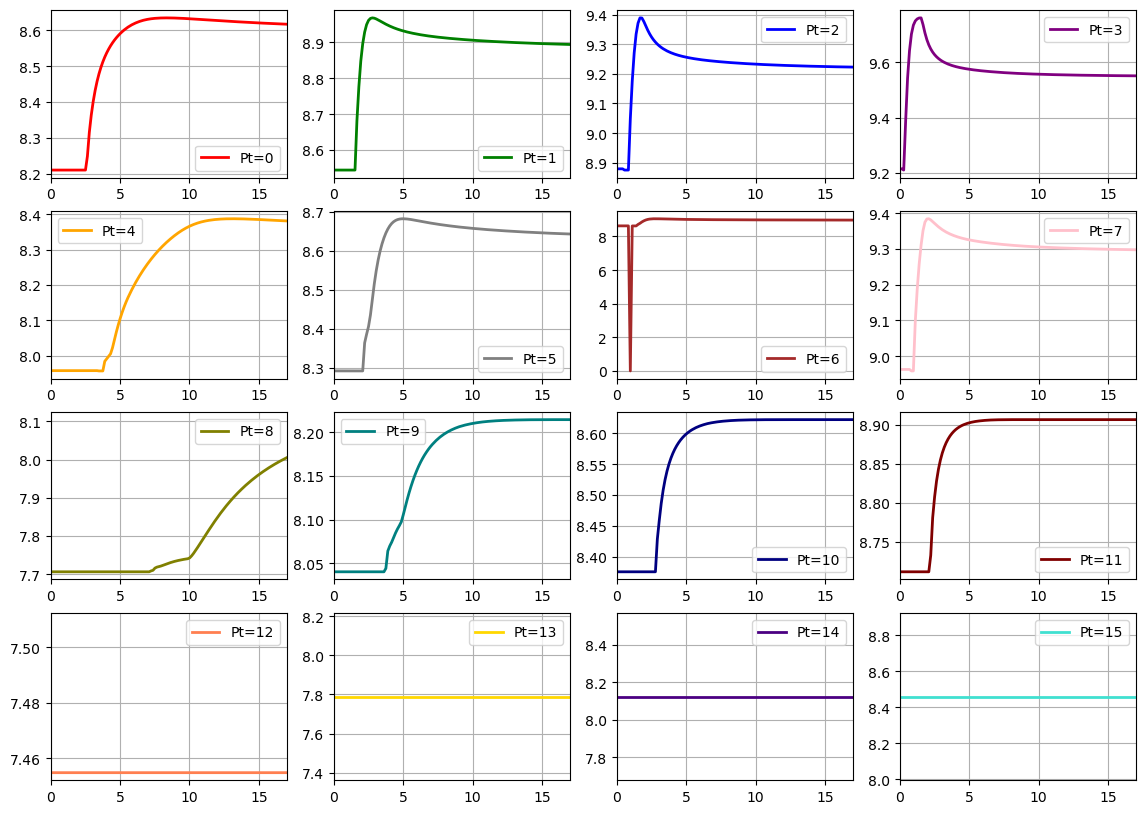

In [60]:
# write a function taht reads all the gauge data and plot them into 16 subplots
import matplotlib.pyplot as plt
def plot_gauge():
    #  look for all gauge files
    gauge_files = glob.glob('gauge*.txt')
    figsize(14, 10)
    colours = ['red', 'green', 'blue', 'purple', 'orange', 'gray', 'brown', 'pink', 'olive', 'teal', 'navy', 'maroon', 'coral', 'gold', 'indigo', 'turquoise']
    for gauge in range(len(gauge_files)):
        time, h,eta, topo = read_gauge_data(gauge_files[gauge])
        # plot the data
        subplot(4,4,gauge+1)
        plot(time/3600,eta,color=colours[gauge],label=f'Pt={gauge}',linewidth=2)
        
        # if gauge < 12:
        #     xticks([])  
        # add a legend
        xlim([0,17])
        grid()
        legend(loc='best')
plot_gauge()